<a href="https://colab.research.google.com/github/Valenttanda/submission/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyek Analisis Data: E-Commerce Public Dataset

- Nama: Mohammad Valeriant Qumara Tanda
- Email: mc180d5y0566@student.devacademy.id
- ID Dicoding: MC180D5Y0566

##Menentukan Pertanyaan Bisnis
- Bagaimana performa pemesanan semua produk di setiap kota dan state?
- Produk apa yang paling banyak dan paling sedikit dipesan?


##Import semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Data Wrangling

##Gathering Data

###Menampilkan dataset customers_df

In [ ]:
customers_df = pd.read_csv("/content/drive/MyDrive/submission/dataset/ecommerce_dataset/olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


###Menampilkan dataset geolocation_df

In [ ]:
geolocation_df = pd.read_csv("/content/drive/MyDrive/submission/dataset/ecommerce_dataset/olist_geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


###Menampilkan dataset orders_df

In [ ]:
orders_df = pd.read_csv("/content/drive/MyDrive/submission/dataset/ecommerce_dataset/olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


###Menampilkan dataset items_df

In [ ]:
items_df = pd.read_csv("/content/drive/MyDrive/submission/dataset/ecommerce_dataset/olist_order_items_dataset.csv")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


###Menampilkan dataset payments_df

In [ ]:
payments_df = pd.read_csv("/content/drive/MyDrive/submission/dataset/ecommerce_dataset/olist_order_payments_dataset.csv")
payments_df.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


###Menampilkan dataset reviews_df

In [ ]:
reviews_df = pd.read_csv("/content/drive/MyDrive/submission/dataset/ecommerce_dataset/olist_order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


###Menampilkan dataset products_df

In [ ]:
products_df = pd.read_csv("/content/drive/MyDrive/submission/dataset/ecommerce_dataset/olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


###Menampilkan dataset sellers_df

In [ ]:
sellers_df = pd.read_csv("/content/drive/MyDrive/submission/dataset/ecommerce_dataset/olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


###Menampilkan dataset product_category_df

In [ ]:
product_category_df = pd.read_csv("/content/drive/MyDrive/submission/dataset/ecommerce_dataset/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


##Gathering Data Conclusion

1. Pengumpulan data relatif mudah, dan setiap dataset yang ada saling berkaitan

#Assessing Data

###Menilai data customers_df

Cek informasi data tiap kolom

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Insight:
- Data menunjukkan tidak ada data yang memiliki jumlah baris yang berbeda
- Tipe data untuk setiap kolom tidak ada masalah

Cek duplikasi data

In [ ]:
print("Jumlah duplikasi data: ", customers_df.duplicated().sum())

Jumlah duplikasi data:  0


Insight:
- Tidak ada duplikasi data pada customers_df

Cek parameter statistik

In [ ]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Insight:
- Tidak ada data yang tidak wajar pada setiap kolom di customers_df

###Menilai data geolocation_df

Cek informasi data tiap kolom

In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Insight:
- Data menunjukkan tidak ada data yang memiliki jumlah baris yang berbeda
- Tipe data untuk setiap kolom tidak ada masalah


Cek duplikasi data

In [ ]:
print("Jumlah duplikasi data: ", geolocation_df.duplicated().sum())

Jumlah duplikasi data:  261831


Insight:
- Ada 261831 data yang terduplikasi

Cek parameter statistik

In [ ]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


Insight:
- Tidak ada data yang tidak wajar pada setiap kolom di geolocation_df

###Menilai data orders_df

Cek informasi tiap kolom

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Insight:
- Terdapat missing values pada kolom order_approved_at sampai order_delivered_customer_date
- Terdapat kesalahan tipe data pada kolom order_purchase_timestamp sampai order_estimated_delivery_date

Cek missing value

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Insight:
- Terdapat 160 missing values pada kolom order_approved_at
- Terdapat 1783 missing values pada kolom order_delivered_carrier_date
- Terdapat 2965 missing values pada kolom order_delivered_customer_date

Cek duplikasi data

In [ ]:
print("Jumlah duplikasi data: ", orders_df.duplicated().sum())

Jumlah duplikasi data:  0


Insight:
- Tidak ada duplikasi data

###Menilai data items_df

Cek informasi tiap kolom

In [ ]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Insight:
- Terdapat kesalahan tipe data pada kolom shipping_limit_date

Cek duplikasi data

In [ ]:
print("Jumlah duplikasi data: ", items_df.duplicated().sum())

Jumlah duplikasi data:  0


Insight:
- Tidak ada duplikasi data

###Menilai data payments_df

Cek informasi tiap kolom

In [ ]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Insight:
- Data menunjukkan tidak ada data yang memiliki jumlah baris yang berbeda
- Tipe data untuk setiap kolom tidak ada masalah

Cek duplikasi data

In [ ]:
print("Jumlah duplikasi data: ", payments_df.duplicated().sum())

Jumlah duplikasi data:  0


Insight:
- Tidak ada duplikasi data

Cek parameter statistik

In [ ]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Insight:
- Tidak ada data yang tidak wajar pada setiap kolom di payments_df

###Menilai data reviews_df

Cek informasi tiap kolom

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Insight:
- Terdapat missing values pada kolom review_comment_title dan review_comment_message
- Terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp

Cek missing values

In [ ]:
reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Insight:
- Terdapat 87656 missing values pada kolom review_comment_title
- Terdapat 58247 missing values pada kolom review_comment_message

Cek duplikasi data

In [ ]:
print("Jumlah duplikasi data: ", reviews_df.duplicated().sum())

Jumlah duplikasi data:  0


Insight:
- Tidak ada duplikasi data

Cek parameter statistik

In [ ]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Insight:
- Tidak ada data yang tidak wajar pada setiap kolom di reviews_df

###Menilai data products_df

Cek informasi tiap kolom

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Insight:
- Terdapat missing values pada kolom product_category_name sampai product_width_cm

Cek missing values

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Insight:
- Terdapat 610 missing values pada kolom product_category_name sampai product_photos_qty
- Terdapat 2 missing values pada kolomm product_weight_g sampai product_width_cm

Cek duplikasi data

In [ ]:
print("Jumlah duplikasi data: ", products_df.duplicated().sum())

Jumlah duplikasi data:  0


Insight:
- Tidak ada duplikasi data

Cek parameter statistik

In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Insight:
- Tidak ada data yang tidak wajar pada setiap kolom di products_df

###Menilai data sellers_df

Cek informasi tiap kolom

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Insight:
- Data menunjukkan tidak ada data yang memiliki jumlah baris yang berbeda
- Tipe data untuk setiap kolom tidak ada masalah

Cek duplikasi data

In [ ]:
print("Jumlah duplikasi data: ", sellers_df.duplicated().sum())

Jumlah duplikasi data:  0


Insight:
- Tidak ada duplikasi data

###Menilai data product_category_df

Cek informasi tiap kolom

In [ ]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Insight:
- Data menunjukkan tidak ada data yang memiliki jumlah baris yang berbeda
- Tipe data untuk setiap kolom tidak ada masalah

Cek duplikasi data

In [ ]:
print("Jumlah duplikasi data: ", product_category_df.duplicated().sum())

Jumlah duplikasi data:  0


Insight:
- Tidak ada duplikasi data

##Assessing Data Conclusion


1. geolocation_df:
- Ada 261831 data yang terduplikasi

2. orders_df:
- Terdapat kesalahan tipe data pada kolom order_purchase_timestamp sampai order_estimated_delivery_date
- Terdapat 160 missing values pada kolom order_approved_at
- Terdapat 1783 missing values pada kolom order_delivered_carrier_date
- Terdapat 2965 missing values pada kolom order_delivered_customer_date

3. items_df:
- Terdapat kesalahan tipe data pada kolom shipping_limit_date


4. reviews_df:
- Terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp
- Terdapat 87656 missing values pada kolom review_comment_title
- Terdapat 58247 missing values pada kolom review_comment_message


5. products_df:
- Terdapat 610 missing values pada kolom product_category_name sampai product_photos_qty
- Terdapat 2 missing values pada kolom product_weight_g sampai product_width_cm

#Cleaning Data

###Membersihkan data geolocation_df

Menghilangkan data duplikat

In [ ]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi data: ", geolocation_df.duplicated().sum())

Jumlah duplikasi data:  0


Insight:
- Data duplikat pada geolocation_df telah dihapus

###Membersihkan data orders_df

1. Mengganti tipe data order_purchase_timestamp sampai order_estimated_delivery_date menjadi datetime

In [ ]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

Cek informasi data

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Insight:
- Tipe data pada kolom order_purchase_timestamp sampai order_estimated_delivery_date telah diganti menjadi datetime

2. Mengatasi missing values pada order_approved_at sampai order_delivered_customer_date

- Cek data yang mengandung missing value dengan filter order_delivered_customer_date

In [ ]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


Insight:
Terlihat bahwa adanya missing value disebabkan order_status yang berbeda

Cek nilai pada kolom order_delivered_customer_date dengan order_status

In [ ]:
orders_df.groupby("order_status")["order_delivered_customer_date"].value_counts()

order_status  order_delivered_customer_date
canceled      2016-10-14 15:07:11              1
              2016-10-16 14:36:59              1
              2016-10-19 18:47:43              1
              2016-11-08 10:58:34              1
              2016-11-09 14:53:50              1
                                              ..
delivered     2018-09-25 00:47:25              1
              2018-09-27 02:24:33              1
              2018-10-02 00:18:50              1
              2018-10-11 16:41:14              1
              2018-10-17 13:22:46              1
Name: count, Length: 95664, dtype: int64

Mendapatkan jumlah nilai berdasarkan order_status

In [ ]:
orders_df.order_status.value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


Insight:
Karena tidak ada pola yang dapat dibentuk, maka semua missing values akan diganti seperti berikut:
- semua missing values pada order_status = ["canceled", "unavailable"], akan diisi dengan "Not Delivered"
- semua missing values pada order_status = ["invoiced", "processing", "created", "approved"], akan diisi dengan "Pending"
- missing values pada order_status = "shipped" di kolom order_delivered_customer_date, akan dihitung dengan mengurangi waktu pada order_estimated_delivery_date dengan order_delivered_carrier_date

Mengganti missing values pada order_status = "shipped" di kolom order_delivered_customer_date dengan memperkirakan selisih dari order_estimated_delivery_date dengan order_delivered_carrier_date

In [ ]:
orders_df.loc[orders_df["order_status"] == "shipped", "order_delivered_customer_date"] = orders_df["order_estimated_delivery_date"] - orders_df["order_delivered_carrier_date"]

<ipython-input-189-80d161a029dc>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<TimedeltaArray>
['22 days 09:28:00', '26 days 04:20:37', '27 days 10:38:13',
 '20 days 06:31:26', '29 days 08:40:00', '17 days 07:49:47',
 '23 days 02:51:32', '15 days 09:51:00', '26 days 08:30:27',
 '13 days 04:52:17',
 ...
 '15 days 11:27:52', '24 days 05:21:08',  '7 days 07:01:24',
 '14 days 03:22:19', '35 days 13:03:14', '16 days 05:02:21',
 '17 days 09:26:00', '15 days 11:33:00', '19 days 10:09:00',
 '21 days 04:41:02']
Length: 1107, dtype: timedelta64[ns]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  orders_df.loc[orders_df["order_status"] == "shipped", "order_delivered_customer_date"] = orders_df["order_estimated_delivery_date"] - orders_df["order_delivered_carrier_date"]


Cek data orders_df

In [ ]:
orders_df.head(10000)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
9995,651f02528e2e297f3d28dca2f4c09a51,72bb4b179b30a3befe3eb909174f2bce,delivered,2018-07-28 15:40:18,2018-07-30 19:32:07,2018-08-01 15:24:00,2018-08-07 22:05:54,2018-08-16
9996,674f1f9e4afc192f4400bf65ae05df5b,4843357c686509ee6aa2c1ba02aff371,delivered,2018-04-25 23:08:51,2018-04-26 20:35:15,2018-04-27 14:08:00,2018-05-07 23:06:30,2018-05-18
9997,b76914fad8489589b7eca037a01c7dc6,102d5f33c41586f432227d8206b4ba66,delivered,2018-06-28 11:39:51,2018-06-28 12:31:18,2018-06-29 13:20:00,2018-07-03 19:06:49,2018-07-24
9998,0847e79b172a265faa7bd23222c56222,1bef529baa69f231b14112176ea31608,delivered,2018-06-14 20:48:50,2018-06-15 21:01:11,2018-06-18 11:22:00,2018-06-21 21:12:03,2018-07-26


Insight:
Hasil yang ditunjukkan pada kolom order_delivered_customer_date ternyata tidak seperti data-data berformat datetime yang lain. Oleh karena itu, kolom order_delivered_customer_date dengan parameter order_status = "shipped" selanjutnya akan diganti dengan "On Shipping"

In [ ]:
orders_df.loc[orders_df["order_status"].isin(["shipped"]), "order_delivered_customer_date"] = "On Shipping"


Cek data orders_df

In [ ]:
orders_df.head(10000)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
9995,651f02528e2e297f3d28dca2f4c09a51,72bb4b179b30a3befe3eb909174f2bce,delivered,2018-07-28 15:40:18,2018-07-30 19:32:07,2018-08-01 15:24:00,2018-08-07 22:05:54,2018-08-16
9996,674f1f9e4afc192f4400bf65ae05df5b,4843357c686509ee6aa2c1ba02aff371,delivered,2018-04-25 23:08:51,2018-04-26 20:35:15,2018-04-27 14:08:00,2018-05-07 23:06:30,2018-05-18
9997,b76914fad8489589b7eca037a01c7dc6,102d5f33c41586f432227d8206b4ba66,delivered,2018-06-28 11:39:51,2018-06-28 12:31:18,2018-06-29 13:20:00,2018-07-03 19:06:49,2018-07-24
9998,0847e79b172a265faa7bd23222c56222,1bef529baa69f231b14112176ea31608,delivered,2018-06-14 20:48:50,2018-06-15 21:01:11,2018-06-18 11:22:00,2018-06-21 21:12:03,2018-07-26


Mengganti missing values pada order_status = ["canceled", "unavailable"] dengan "Not Delivered"

In [ ]:
orders_df.loc[orders_df["order_status"].isin(["canceled", "unavailable"]), "order_approved_at"] = "Not Delivered"
orders_df.loc[orders_df["order_status"].isin(["canceled", "unavailable"]), "order_delivered_carrier_date"] = "Not Delivered"
orders_df.loc[orders_df["order_status"].isin(["canceled", "unavailable"]), "order_delivered_customer_date"] = "Not Delivered"

Mengganti missing values pada order_status = ["invoiced", "processing", "created", "approved"] dengan "Pending"

In [ ]:
orders_df.loc[orders_df["order_status"].isin(["invoiced", "processing", "created", "approved"]), "order_approved_at"] = "Pending"
orders_df.loc[orders_df["order_status"].isin(["invoiced", "processing", "created", "approved"]), "order_delivered_carrier_date"] = "Pending"
orders_df.loc[orders_df["order_status"].isin(["invoiced", "processing", "created", "approved"]), "order_delivered_customer_date"] = "Pending"

Cek missing values

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,2
order_delivered_customer_date,8
order_estimated_delivery_date,0


Insight:
Setelah dilakukan penggantian nilai yang hilang, didapat masih ada missing values pada kolom order_approved_at sampai order_delivered_customer_date

Cek data dengan missing values di kolom order_approved_at


In [ ]:
orders_df.loc[orders_df["order_approved_at"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


Cek data dengan missing values di kolom order_delivered_carrier_date


In [ ]:
orders_df.loc[orders_df["order_delivered_carrier_date"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


Cek data dengan missing values di kolom order_delivered_customer_date

In [ ]:
orders_df.loc[orders_df["order_delivered_customer_date"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


Cek parameter statistik untuk mencari dan menentukan pola

In [ ]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99427,99439,99433,99441
unique,99441,99441,8,NaN,89223,80953,95661,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,Not Delivered,Not Delivered,Not Delivered,NaN
freq,1,1,96478,NaN,1234,1234,1234,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,NaN,NaN,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,NaN,NaN,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,NaN,NaN,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,NaN,NaN,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,NaN,NaN,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,NaN,NaN,2018-11-12 00:00:00


Insight:
Karena missing values berada di parameter order_status = "delivered", dan tidak ditemukan pola apa pun untuk mengisi semua missing values tersebut, maka:
- semua missing values pada order_approved_at akan diisi dengan "Approved"
- semua missing values pada order_delivered_carried_date dan order_delivered_customer_date akan diisi dengan "delivered"

In [ ]:
orders_df.loc[orders_df["order_approved_at"].isna(), "order_approved_at"] = "Approved"
orders_df.loc[orders_df["order_delivered_carrier_date"].isna(), "order_delivered_carrier_date"] = "delivered"
orders_df.loc[orders_df["order_delivered_customer_date"].isna(), "order_delivered_customer_date"] = "delivered"

Cek missing values

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


Insight:
Semua missing values telah terisi

###Membersihkan data items_df

Mengganti tipe data shipping_limit_date menjadi datetime

In [ ]:
items_df["shipping_limit_date"] = pd.to_datetime(items_df["shipping_limit_date"])

Cek informasi data

In [ ]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Insight:
Tipe data shipping_limit_date telah diganti menjadi datetime

###Membersihkan data reviews_df

1. Mengganti tipe data review_creation_date dan review_answer_timestamp menjadi datetime

In [ ]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  reviews_df[column] = pd.to_datetime(reviews_df[column])

Cek informasi data

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Insight:
Tipe data review_creation_date dan review_answer_timestamp telah diganti menjadi datetime

2. Mengatasi missing values pada kolom review_comment_title dan review_comment_message

Karena missing values berada di kolom review_comment_title dan review_comment_message, maka:
- missing values pada kolom review_comment_title diisi dengan "No Title"
- missing values pada kolom review_comment_message diisi dengan "No Comment"

In [ ]:
reviews_df["review_comment_title"] = reviews_df["review_comment_title"].fillna("No Title")
reviews_df["review_comment_message"] = reviews_df["review_comment_message"].fillna("No Comment")

Cek missing values

In [ ]:
reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


Insight:
Semua missing values telah diisi

###Membersihkan data products_df

Mengatasi missing values pada kolom product_category_name sampai product_width_cm

Ambil nilai mode dari setiap parameter untuk mengisi missing values

In [ ]:
products_df.loc[products_df["product_category_name"].isna(), "product_category_name"] = products_df.product_category_name.mode()[0]
products_df.loc[products_df["product_name_lenght"].isna(), "product_name_lenght"] = products_df.product_name_lenght.mode()[0]
products_df.loc[products_df["product_description_lenght"].isna(), "product_description_lenght"] = products_df.product_description_lenght.mode()[0]
products_df.loc[products_df["product_photos_qty"].isna(), "product_photos_qty"] = products_df.product_photos_qty.mode()[0]
products_df.loc[products_df["product_weight_g"].isna(), "product_weight_g"] = products_df.product_weight_g.mode()[0]
products_df.loc[products_df["product_length_cm"].isna(), "product_length_cm"] = products_df.product_length_cm.mode()[0]
products_df.loc[products_df["product_height_cm"].isna(), "product_height_cm"] = products_df.product_height_cm.mode()[0]
products_df.loc[products_df["product_width_cm"].isna(), "product_width_cm"] = products_df.product_width_cm.mode()[0]

Cek missing values

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Insight:
Semua missing values telah diisi

##Cleaning Data Conclusion

1. orders_df memakan waktu yang cukup lama untuk dibersihkan, karena adanya parameter tambahan yang tidak mungkin langsung mengisi missing values dengan satu nilai saja
2. products_df menggunakan nilai mode karena tidak ada pola yang dapat dibentuk

# Exploratory Data Analysis (EDA)

### Menggabungkan Data

Data customers_df dengan orders_df

In [ ]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Data items_df dengan products_df

In [ ]:
products_items_df = pd.merge(
    left=items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
products_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


Data orders_customers_df dengan products_items_df

In [ ]:
orders_customers_products_items_df = pd.merge(
    left=orders_customers_df,
    right=products_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_customers_products_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


Data orders_customers_products_items_df dengan product_categoty_df

In [269]:
sales_df = pd.merge(
    left=orders_customers_products_items_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
sales_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


Data sales_df dengan reviews_df

In [271]:
reviews_sales_df = pd.merge(
    left=sales_df,
    right=reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
reviews_sales_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,19.0,13.0,19.0,perfumery,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,24.0,19.0,21.0,auto,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Title,No Comment,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,30.0,10.0,20.0,pet_shop,359d03e676b3c069f62cadba8dd3f6e8,5.0,No Title,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,51.0,15.0,15.0,stationery,e50934924e227544ba8246aeb3770dd4,5.0,No Title,No Comment,2018-02-17,2018-02-18 13:02:51


Menambah data year_month untuk menampilkan

###Explore

Jumlah order berdasarkan customer_city

In [285]:
reviews_sales_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


Insight:
Kota dengan order terbayak yaitu dari sao paulo dengan 15540 pemesan

Jumlah order berdasarkan customer_state

In [ ]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Insight:
State dengan order terbanyak yaitu dari SP dengan 41746 pemesan

Produk paling banyak dipesan

In [260]:
sales_df.groupby(by=["product_category_name_english"]).order_id.nunique().sort_values(ascending=False)

,order_id
product_category_name_english,
bed_bath_table,9417
health_beauty,8836
sports_leisure,7720
computers_accessories,6689
furniture_decor,6449
...,...
arts_and_craftmanship,23
la_cuisine,13
cds_dvds_musicals,12


Insight:
Produk yang paling banyak terjual adalah bed_bath_table dengan 9417 orders

Jumlah rating dari setiap produk yang dipesan

In [275]:
reviews_sales_df.groupby(by=["review_score","product_category_name_english"]).order_id.nunique().sort_values(ascending=False)

review_score  product_category_name_english    
5.0           health_beauty                        5398
              bed_bath_table                       4980
              sports_leisure                       4646
              computers_accessories                3703
              furniture_decor                      3587
                                                   ... 
3.0           cds_dvds_musicals                       1
4.0           la_cuisine                              1
3.0           costruction_tools_tools                 1
              dvds_blu_ray                            1
2.0           furniture_mattress_and_upholstery       1
Name: order_id, Length: 340, dtype: int64

Insight:
Produk dengan rating 5 tertinggi adalah health_beauty dengan 5398 rating

## Exploratory Data Analysis (EDA) Conclusion

1. Kota dengan order terbayak yaitu dari sao paulo dengan 15540 pemesan
2. State dengan order terbanyak yaitu dari SP dengan 41746 pemesan
3. Produk yang paling banyak terjual adalah bed_bath_table dengan 9417 orders
4. Produk dengan rating 5 tertinggi adalah health_beauty dengan 5398 rating

#Visualization & Explanatory Analysis

##1. Bagaimana performa pemesanan semua produk di setiap kota dan state?



###Membuat dataframe untuk menampung informasi terkait pemesanan produk di setiap kota dan state

Dataframe untuk pemesanan produk setiap kota

In [289]:
sum_orders_city_df = reviews_sales_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index()
sum_orders_city_df.head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


Dataframe untuk pemesanan produk setiap state

In [297]:
sum_orders_state_df = reviews_sales_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index()
sum_orders_state_df.head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


###Visualisasi data untuk sum_orders_city_df dan sum_orders_state_df

Visualisasi data untuk sum_orders_city_df

<ipython-input-309-02c548867fc5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


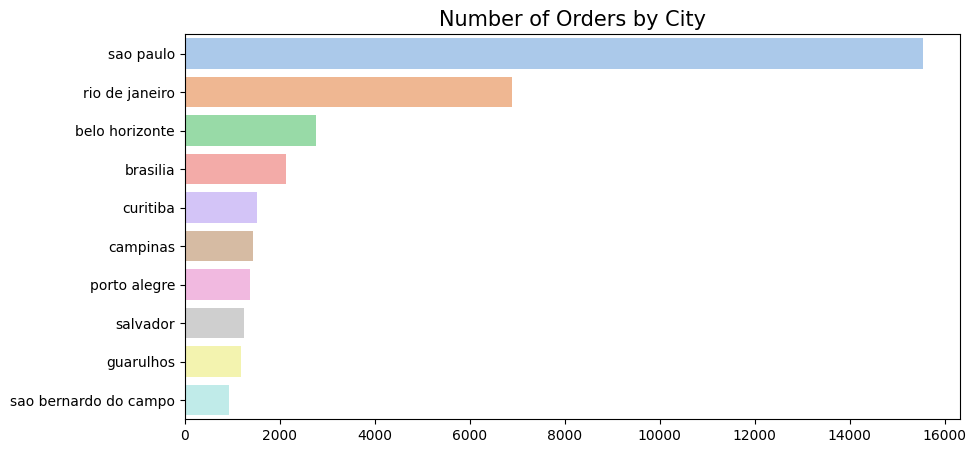

In [309]:
sum_orders_city_df.rename(columns={
    "order_id": "sum_orders"
}, inplace=True)

plt.figure(figsize=(10,5))
sns.barplot(
    x="sum_orders",
    y="customer_city",
    data=sum_orders_city_df.sort_values(by="sum_orders", ascending=False).head(10),
    palette="pastel"
)

plt.title("Number of Orders by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.show()

Insight:
Kota dengan order terbanyak adalah sao paulo

Visualisasi data untuk sum_orders_city_df

<ipython-input-312-7ca0cd0066b3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


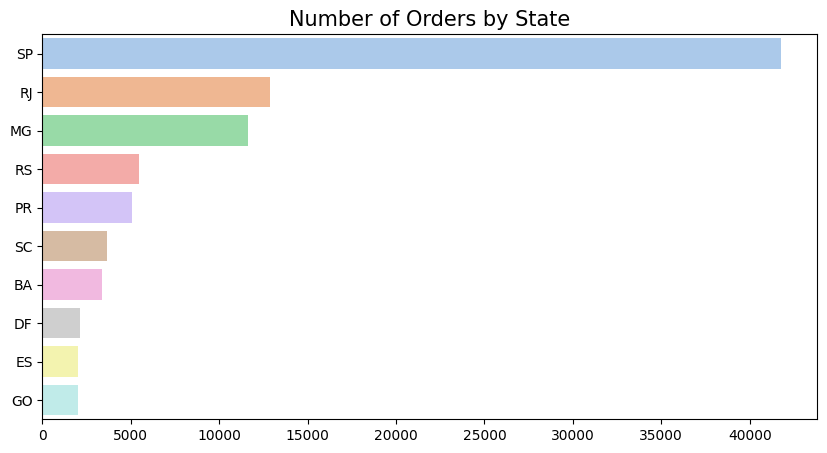

In [312]:
sum_orders_state_df.rename(columns={
    "order_id": "sum_orders"
}, inplace=True)

plt.figure(figsize=(10,5))
sns.barplot(
    x="sum_orders",
    y="customer_state",
    data=sum_orders_state_df.sort_values(by="sum_orders", ascending=False).head(10),
    palette="pastel"
)

plt.title("Number of Orders by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.show()

Insight:
State dengan order terbanyak adalah SP

##2. Produk apa yang paling banyak dan paling sedikit dipesan?


###Membuat dataframe untuk menampung informasi terkait produk paling banyak dan paling sedikit dipesan

Dataframe untuk produk yang paling banyak dipesan

In [313]:
most_orders_df = reviews_sales_df.groupby(by=["product_category_name_english"]).order_id.nunique().sort_values(ascending=False).reset_index()
most_orders_df.head(10)

,product_category_name_english,order_id
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
5,housewares,5884
6,watches_gifts,5624
7,telephony,4199
8,auto,3897
9,toys,3886


Dataframe untuk produk yang paling sedikit dipesan

In [314]:
least_orders_df = reviews_sales_df.groupby(by=["product_category_name_english"]).order_id.nunique().sort_values(ascending=True).reset_index()
least_orders_df.head(10)

,product_category_name_english,order_id
0,security_and_services,2
1,fashion_childrens_clothes,8
2,cds_dvds_musicals,12
3,la_cuisine,13
4,arts_and_craftmanship,23
5,home_comfort_2,24
6,diapers_and_hygiene,27
7,fashion_sport,27
8,flowers,29
9,music,38


###Visualisasi data untuk most_orders_df dan least_orders_df

<ipython-input-321-8620aca4cf40>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-321-8620aca4cf40>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


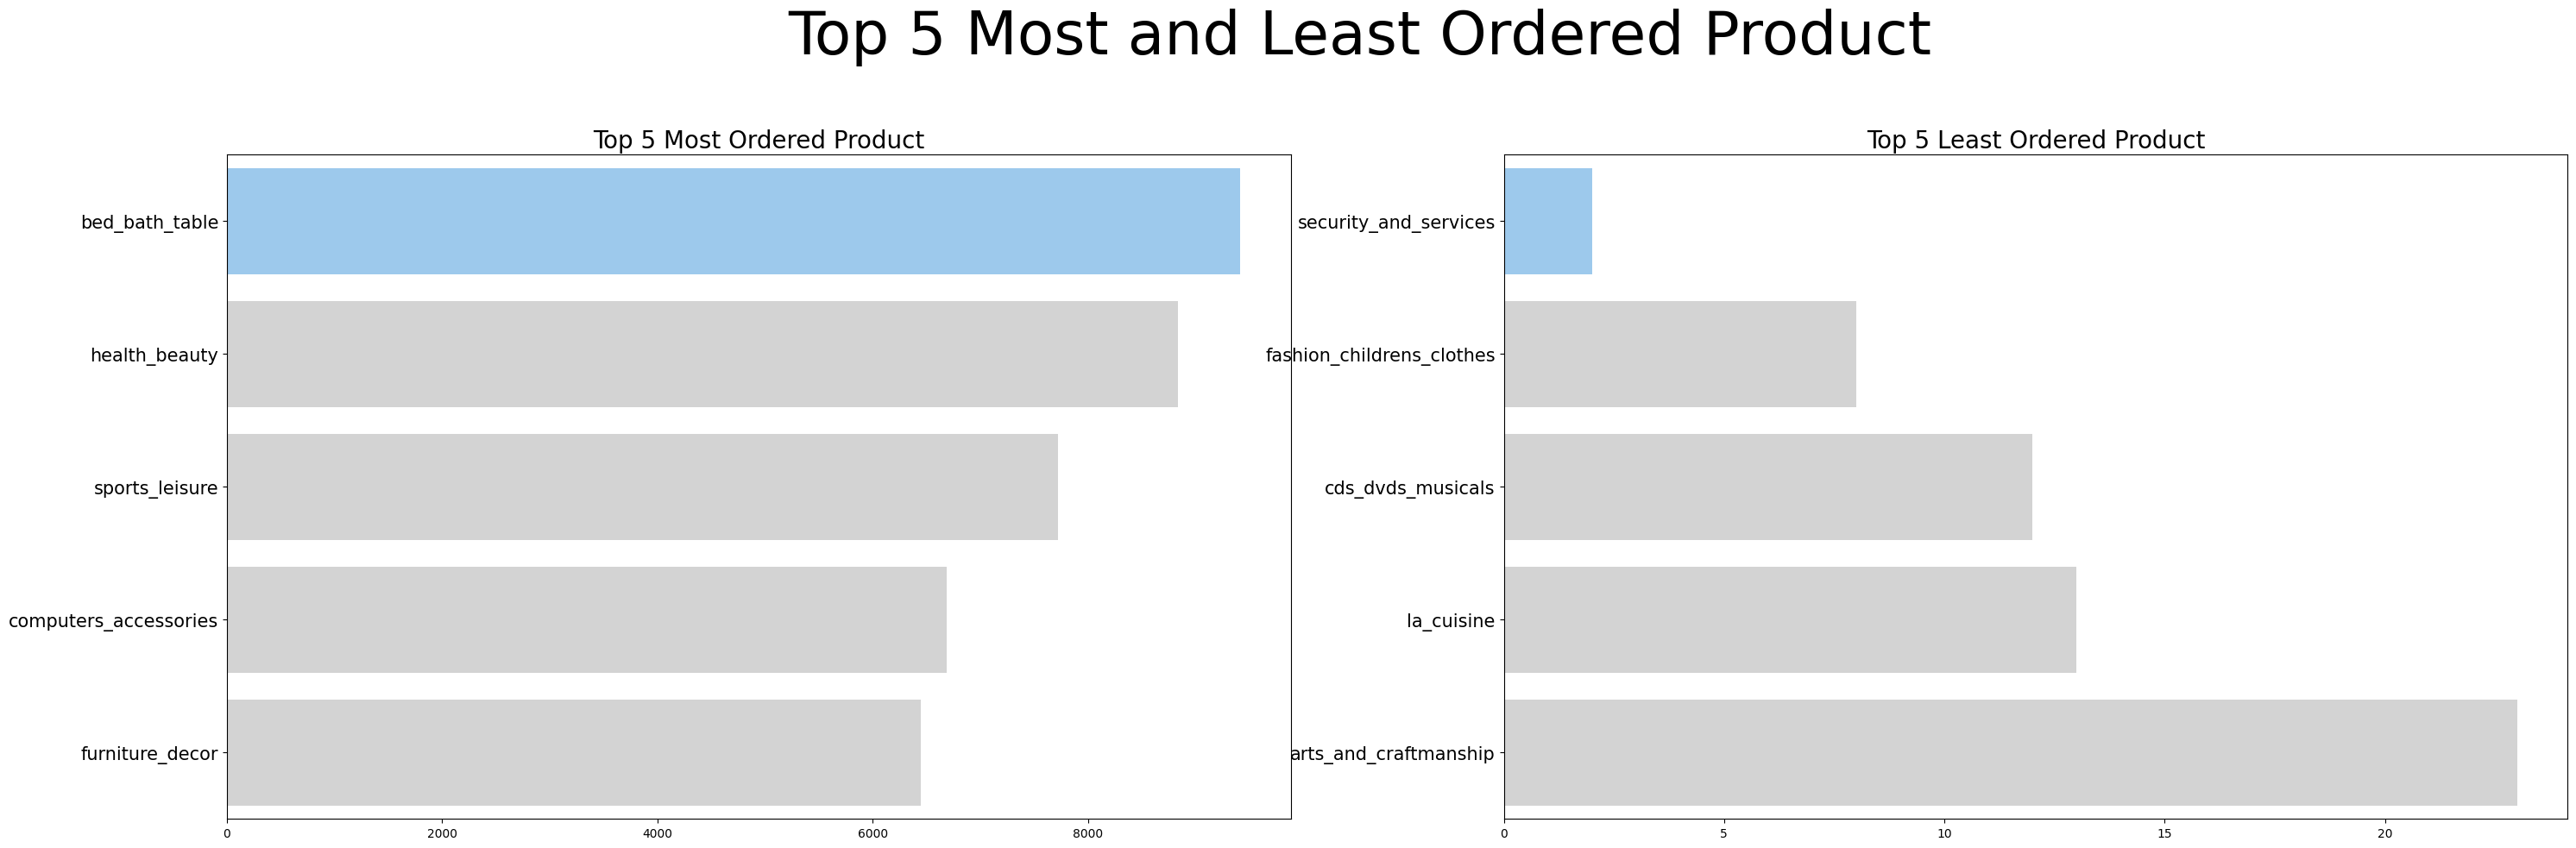

In [321]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35,10))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="order_id",
    y="product_category_name_english",
    data=most_orders_df.head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 5 Most Ordered Product", loc="center", fontsize=20)
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(
    x="order_id",
    y="product_category_name_english",
    data=least_orders_df.head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Top 5 Least Ordered Product", loc="center", fontsize=20)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Top 5 Most and Least Ordered Product", fontsize=50, y=1.05)
plt.show()

Insight:
- Produk yang paling banyak dipesan adalah bed_bath_table
- Produk yang paling sedikit dipesan adalah security_and_services

# Conclusion

1. Kota dengan order terbanyak yaitu sao paulo, dan state dengan order terbanyak yaitu SP
2. Produk yang paling banyak dipesan adalah bed_bath_table, dan produk yang paling sedikit dipesan adalah security_and_services

In [342]:
reviews_sales_df.to_csv("reviews_sales_df.csv", index=False)